In this notebook we will create a simple Perceptron to get a linear predictions that fits some given points

In [111]:
import numpy as np
from matplotlib import pyplot as plt

## Data preparation

We will create 4 points

In [112]:
x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

y = [1.0, -1.0, -1.0, 1.0]

We can make a 3d plot to show the data

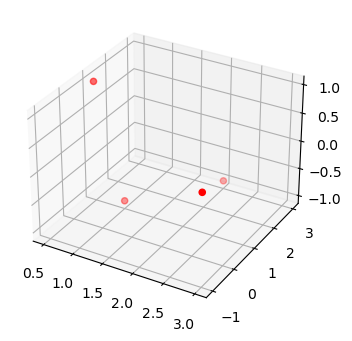

In [113]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in x], [x[1] for x in x], [x[2] for x in x], c='r', marker='o')

## Perceptron

We will create a class for representing the Perceptron

In [114]:
class Neuron:
    
    # Constructor
    def __init__(self, n_inputs) -> None:
        self.weights = 0.01 * (np.random.rand(n_inputs) *2 -1) # Weights
        self.bias = 0.01 * (np.random.rand() *2 -1) # Bias
        
    def __call__(self, inputs):
        return self.activation(self.weighted_sum(inputs))
        
    # to_string
    def __str__(self) -> str:
        return f"Neuron: weights={self.weights}, bias={self.bias}"
    
    # Generates the potentials and outputs for the training data
    def generate_outputs(self, train):
        potentials, outputs = [], []
        
        # Weights
        for inputs in train:
            potentials.append(self.weighted_sum(inputs))
            outputs.append(self.activation(potentials[-1]))
        # Bias
        potentials.append(self.weights[-1])
        
        return potentials, outputs
    
    
    # Weighted sum
    def weighted_sum(self, inputs):
        return np.dot(self.weights, inputs) + self.bias
    
    # Activation function
    def activation(self, x):
        return np.tanh(x)
    

## Forward pass

In [115]:
# We can create an example neuron
n = Neuron(3)
print(n)

Neuron: weights=[-0.0092404  -0.00490712  0.00302132], bias=-0.006502972187285767


In [116]:
# We can check the output of the neuron for every input in the x set
[n(i) for i in x]

[-0.04270049043994712,
 -0.027799232847052324,
 -0.013008242339446833,
 -0.02366739998758529]

## Error function

In [117]:
# The error function will be the Mean Squared Error
def error_function(target, output):
    error = 0
    for i in range(len(target)):
        print(f"Target: {target[i]}, Output: {output[i]}")
        error_i = (target[i] - output[i])**2
        print(f"error_i: {error_i}")
        error += error_i
        
    print()
    print(f"Total error: {error}")
    
    return error / len(target)

In [118]:
def single_error(target, output):
    return (target - output)**2

## Function Derivatives

We will need this derivatives for applying the chain rule

In [119]:
def dError(target, output):
    return 2*(output - target)

def dActivation(x):
    return 1 - np.tanh(x)**2

def dWeightedSum(inputs):
    return inputs

## Single forward pass

In [120]:
# This are the initial weights and bias
print(n)
print()

# We can compute the error for the initial weights and bias
error = error_function(y, [n(i) for i in x])

Neuron: weights=[-0.0092404  -0.00490712  0.00302132], bias=-0.006502972187285767

Target: 1.0, Output: -0.04270049043994712
error_i: 1.0872243127637062
Target: -1.0, Output: -0.027799232847052324
error_i: 0.94517433165278
Target: -1.0, Output: -0.013008242339446833
error_i: 0.9741527296898681
Target: 1.0, Output: -0.02366739998758529
error_i: 1.0478949457973432

Total error: 4.054446319903698


In [121]:
learning_rate = 0.1

# Train function
def train(show_info=False):
    
    for i in range(len(x)):
        #Calculate the potential and the output (forward pass)
        potentials, outputs = n.generate_outputs(x)
        error = single_error(y[i], outputs[i])
        show_info and print(f"input: {x[i]}, target: {y[i]}, potential: {potentials[i]}, output: {outputs[i]}, error: {error}") 

        # Compute the derivatives
        d_error = dError(y[i], outputs[i])
        d_activation = dActivation(potentials[i])
        d_weighted_sum = dWeightedSum(x[i]) + [1]
        show_info and print(f"d_error: {d_error}, d_activation: {d_activation}, d_weighted_sum: {d_weighted_sum}")
        
        # Calculate the gradient for each weight
        for j in range(len(n.weights)):            
            grad = d_error * d_activation * d_weighted_sum[j] # Chain rule
            old_value = n.weights[j]
            # Update the weight
            n.weights[j] += -learning_rate * grad
            
            show_info and print(f"Weight {j} -  grad: {grad}, old_value: {old_value}, new_value: {n.weights[j]}")
            
        # Calculate the gradient for the bias
        grad = d_error * d_activation * d_weighted_sum[-1] # Chain rule
        old_value = n.bias
        # Update the bias
        n.bias += -learning_rate * grad
        
        show_info and print(f"Bias - grad: {grad}, old_value: {old_value}, new_value: {n.bias}")
            
        show_info and  print(n)
        show_info and print()

In [122]:
# train(True)

# We can train the neuron for 100 epochs
for _ in range(100):
    train()

In [123]:
# This are the final weights and bias after training
print(n)
print()

# We can check the error for the trained neuron
error = error_function(y, [n(i) for i in x])


Neuron: weights=[-0.15782733  0.52118524 -1.81287391], bias=-0.3858797503444159

Target: 1.0, Output: 0.9905466033787096
error_i: 8.936670767942496e-05
Target: -1.0, Output: -0.9795768206559812
error_i: 0.00041710625451795726
Target: -1.0, Output: -0.9421087933612193
error_i: 0.0033513918060940028
Target: 1.0, Output: 0.9457977096919465
error_i: 0.002937888274638506

Total error: 0.00679575304292989


As we can see there is a significant improvement in the performance of the perceptron